## Построение нейронной сети
Модули (torch.nn.Module): Это базовый класс для всех нейронных сетевых модулей в PyTorch. При создании нейронной сети в PyTorch обычно используется наследование от torch.nn.Module, и архитектура сети определяется внутри этого класса.  
Слои: torch.nn содержит различные предопределенные слои, такие как линейные (torch.nn.Linear), функции активации (torch.nn.ReLU) и другие. Эти слои являются строительными блоками нейронных сетей.  
Функции потерь: перекрестная энтропия (torch.nn.CrossEntropyLoss)
Утилиты: Кроме того, torch.nn предоставляет различные утилиты для обучения и оценки нейронных сетей, такие как регуляризация (torch.nn.Dropout), нормализация по мини-пакетам (torch.nn.BatchNorm2d, torch.nn.BatchNorm1d) и функции активации.  
Используя torch.nn, можно конструировать и обучать сложные архитектуры нейронных сетей для задач, таких как классификация изображений, обработка естественного языка, обучение с подкреплением и др. 

Rectified Linear Unit
Функция активации ReLU (Rectified Linear Unit) представляет собой простую, но мощную функцию активации, широко используемую в нейронных сетях. Её формула выглядит следующим образом:  

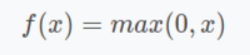  
Это означает, что если входное значение x положительное, функция возвращает это значение, а если x отрицательное, функция возвращает 0.

График ReLU представляет собой линию, которая следует по оси X для отрицательных значений и поднимается линейно с увеличением положительных значений X.

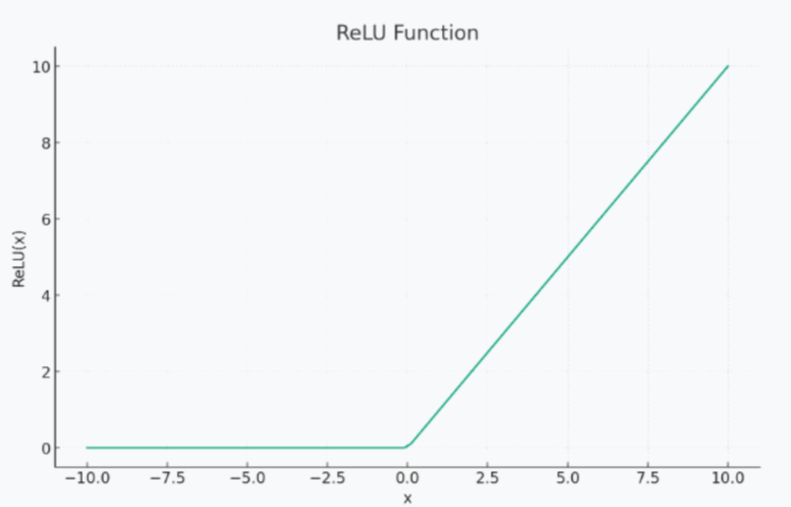  

ReLU используется в качестве функции активации из-за его простоты, ненасыщающего характера и эффективности в борьбе с проблемой исчезающего градиента, что приводит к более быстрому обучению и повышению производительности в глубоких нейронных сетях.

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('../data/dataset.xlsx')

In [3]:
categorial_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [4]:
scaler = StandardScaler()

df[categorial_features] = pd.get_dummies(df[categorial_features], drop_first=True)
df[categorial_features] = df[categorial_features].astype('int64')
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [5]:
X = df.drop(['Больной'], axis=1)
y = df['Больной']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    stratify=y,
                                                    shuffle=True)

In [7]:
from torch.utils.data import TensorDataset, DataLoader

In [8]:
train_dataset = TensorDataset(torch.tensor(X_train.to_numpy()), torch.tensor(y_train.to_numpy()))
val_dataset = TensorDataset(torch.tensor(X_test.to_numpy()), torch.tensor(y_test.to_numpy()))

In [9]:
train_dataloader = DataLoader(train_dataset, batch_size=32)
val_dataloader = DataLoader(val_dataset, batch_size=32)

In [10]:
epochs = 100
model = nn.Sequential(nn.Linear(X_train.shape[-1], 64),
                      nn.ReLU(),
                      nn.Linear(64, 2))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

for epoch in range(epochs):
    model.train()
    train_loss = []
    for batch in train_dataset:
        x, y = batch
        x = x.float()
        
        optimizer.zero_grad()

        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

    model.eval()
    total_corr = 0
    val_loss = []
    with torch.no_grad():
        for batch in val_dataloader:
            x, y = batch
            x = x.float()

            logits = model(x)
            y_pred = torch.argmax(logits, dim=1)
            loss = criterion(logits, y)
            val_loss.append(loss.item())
            total_corr += torch.sum(y_pred == y)
    print('Epoch {}'.format(epoch))
    print('Train loss {}'.format(np.array(train_loss).mean()))
    print('Validation loss {}'.format(np.array(val_loss).mean()))
    print('Validation acc {}'.format(total_corr / (len(val_dataloader) * val_dataloader.batch_size)))

Epoch 0
Train loss 0.5028847862101559
Validation loss 0.30465090870857237
Validation acc 0.8500000238418579
Epoch 1
Train loss 0.24333370407539523
Validation loss 0.2021423414349556
Validation acc 0.8812500238418579
Epoch 2
Train loss 0.1667497247494764
Validation loss 0.171682146191597
Validation acc 0.8812500238418579
Epoch 3
Train loss 0.12930203754408712
Validation loss 0.15663703680038452
Validation acc 0.887499988079071
Epoch 4
Train loss 0.10509347188376912
Validation loss 0.14740236923098565
Validation acc 0.8999999761581421
Epoch 5
Train loss 0.08756121016337026
Validation loss 0.14153303876519202
Validation acc 0.8999999761581421
Epoch 6
Train loss 0.07405240438728365
Validation loss 0.1382858209311962
Validation acc 0.90625
Epoch 7
Train loss 0.06373733644642723
Validation loss 0.1348922248929739
Validation acc 0.90625
Epoch 8
Train loss 0.055579662498021334
Validation loss 0.1337162159383297
Validation acc 0.90625
Epoch 9
Train loss 0.04871334245109096
Validation loss 0.133